In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import cv2
import glob
import tensorflow as tf
import os
IMG_SIZE = 112

In [2]:
def get_data(path, class_name):
    data = []
    for i in range(0, 5):
        
            files = glob.glob(path+"/"+class_name+"/"+str(i)+"/*")
            for f in files:
                img = cv2.imread(f)
                R, G, B = cv2.split(img)
                new_R = cv2.equalizeHist(R)
                new_G = cv2.equalizeHist(G)
                new_B = cv2.equalizeHist(B)
                img = cv2.merge((new_R, new_G, new_B))
                img =  cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                img = tf.keras.preprocessing.image.random_rotation(img, 5.0)
                img = tf.keras.preprocessing.image.random_shear(img, 5.0)
                data.append(np.array([np.array(img) / 255.0, i], dtype=object))
    return data

In [3]:
train_data = get_data("data", "train")
train_data = np.array(train_data, dtype=object)
train_data.shape

(5778, 2)

In [4]:
train_x = []
train_y = []
for i in range(train_data.shape[0]):
    train_x.append(train_data[i][0])
    train_y.append(train_data[i][1])
train_x = np.array(train_x, ndmin=3)
train_y = np.array(train_y, ndmin=1)

In [5]:
train_x.shape

(5778, 112, 112, 3)

In [6]:
val_data = get_data("data", "val")
val_data = np.array(val_data, dtype=object)
val_data.shape

(826, 2)

In [7]:
val_x = []
val_y = []
for i in range(val_data.shape[0]):
    val_x.append(val_data[i][0])
    val_y.append(val_data[i][1])
val_x = np.array(val_x, ndmin=3)
val_y = np.array(val_y, ndmin=1)

In [8]:
test_data = get_data("data", "test")
test_data = np.array(test_data, dtype=object)
test_data.shape

(1656, 2)

In [9]:
test_x = []
test_y = []
for i in range(test_data.shape[0]):
    test_x.append(test_data[i][0])
    test_y.append(test_data[i][1])
test_x = np.array(test_x, ndmin=3)
test_y = np.array(test_y, ndmin=1)

In [10]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
lb = LabelBinarizer()
val_y = lb.fit_transform(val_y)
lb = LabelBinarizer()
test_y = lb.fit_transform(test_y)

In [11]:
train_x.shape, train_y.shape, val_x.shape, val_y.shape, test_x.shape, test_y.shape

((5778, 112, 112, 3),
 (5778, 5),
 (826, 112, 112, 3),
 (826, 5),
 (1656, 112, 112, 3),
 (1656, 5))

In [12]:
index = -1
for i in range(train_y.shape[0]):
    if(train_y[i][4] == 1):
        index = i

c:\Users\19138\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


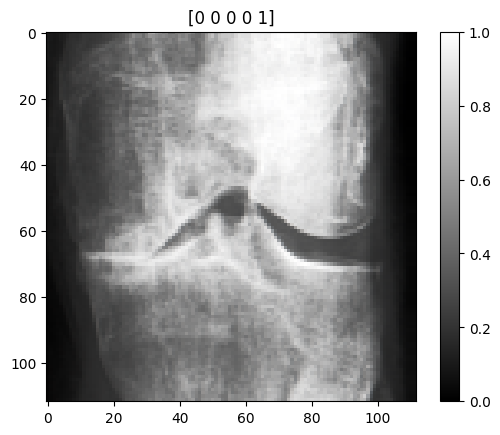

In [13]:
plt.title(train_y[index])
plt.imshow(train_x[index], cmap="gray")
plt.colorbar()

In [14]:
from tensorflow.keras.layers import Conv2D, AveragePooling2D, BatchNormalization, Conv2DTranspose, Flatten, Dense, MaxPooling2D
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers

In [15]:
model = Sequential([
    tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    Conv2D(16, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),),
    Conv2D(16, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),),
    Conv2D(16, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),),
    BatchNormalization(),
    AveragePooling2D((2, 2)),
    Conv2D(32, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal', kernel_regularizer=regularizers.L1L2(l1=1e-4, l2=1e-3),),
    Conv2D(32, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal', kernel_regularizer=regularizers.L1L2(l1=1e-4, l2=1e-3),),
    Conv2D(32, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal', kernel_regularizer=regularizers.L1L2(l1=1e-4, l2=1e-3),),
    BatchNormalization(),
    AveragePooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal', kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-2),),
    Conv2D(64, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal', kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-2),),
    Conv2D(64, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal', kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-2),),
    BatchNormalization(),
    AveragePooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),),
    Conv2D(128, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),),
    Conv2D(128, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),),
    Flatten(),
    Dense(64, activation="relu", kernel_initializer='he_normal'),
    Dense(5, activation="softmax", kernel_initializer='he_normal'),
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 16)      2320      
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 16)     64        
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 56, 56, 16)       0         
 ooling2D)                                                       
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 32)        4

In [17]:
model.compile( optimizer="adam" , loss="binary_crossentropy" , metrics=["binary_accuracy", tf.keras.metrics.AUC()])

In [18]:
from keras.callbacks import EarlyStopping
callbacks = [EarlyStopping(monitor='val_binary_accuracy' , patience=10 , restore_best_weights=True)]
hist = model.fit(train_x, train_y, epochs=15, batch_size=32,
                    validation_data=(val_x,val_y), verbose=1, callbacks=callbacks)

Epoch 1/15
181/181 [==============================] - 132s 714ms/step - loss: 3.9362 - binary_accuracy: 0.7983 - auc: 0.7399 - val_loss: 1.2900 - val_binary_accuracy: 0.8000 - val_auc: 0.7374
Epoch 2/15
181/181 [==============================] - 132s 728ms/step - loss: 0.8436 - binary_accuracy: 0.8073 - auc: 0.7912 - val_loss: 0.8735 - val_binary_accuracy: 0.8000 - val_auc: 0.7899
Epoch 3/15
181/181 [==============================] - 137s 759ms/step - loss: 0.6640 - binary_accuracy: 0.8177 - auc: 0.8176 - val_loss: 0.6890 - val_binary_accuracy: 0.8061 - val_auc: 0.8108
Epoch 4/15
181/181 [==============================] - 135s 747ms/step - loss: 0.5928 - binary_accuracy: 0.8210 - auc: 0.8258 - val_loss: 0.6373 - val_binary_accuracy: 0.7702 - val_auc: 0.7441
Epoch 5/15
181/181 [==============================] - 133s 735ms/step - loss: 0.5405 - binary_accuracy: 0.8232 - auc: 0.8343 - val_loss: 0.5374 - val_binary_accuracy: 0.8119 - val_auc: 0.8177
Epoch 6/15
181/181 [====================

In [19]:
import os.path
if os.path.isfile('models/OsteoCal.h5') is False:
    model.save('models/OsteoCal.h5')

In [20]:
from tensorflow.keras.models import load_model
new_model = load_model('models/OsteoCal.h5')

In [21]:
test_pred = new_model.predict(test_x)

52/52 [==============================] - 10s 184ms/step


In [22]:
from sklearn.metrics import cohen_kappa_score

In [23]:
new_test = []
for x in test_y:
    new_test.append(np.argmax(x))

In [24]:
new_test_pred = []
for x in test_pred:
    new_test_pred.append(np.argmax(x))

In [25]:
print(cohen_kappa_score(new_test_pred, new_test))

0.35000892060660127


In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score(new_test_pred, new_test))

0.5483091787439613


In [27]:
def plot_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["binary_accuracy"]
  val_accuracy = history.history["val_binary_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.plot(epochs, loss, label = "training_loss")
  plt.xlabel("epochs")
  plt.title("loss")
  plt.legend()

  #plot accuracy
  plt.figure() 
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

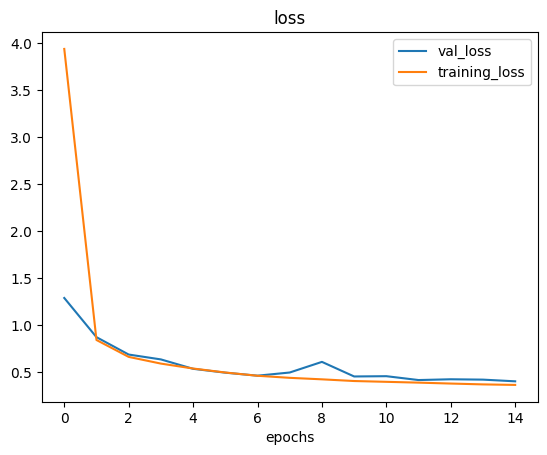

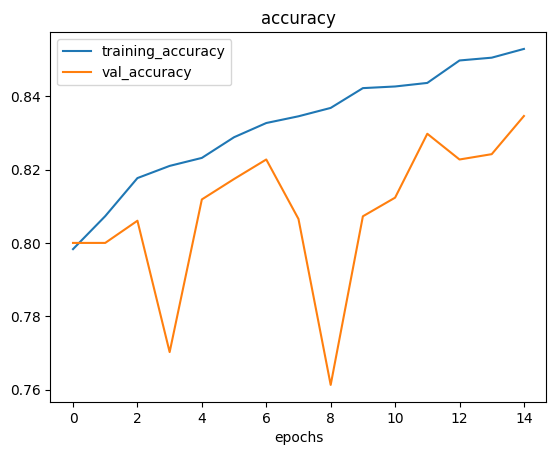

In [28]:
plot_curves(hist)